<a href="https://colab.research.google.com/github/pramodkoujalagi/pycaret/blob/main/m1_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium 

In [4]:
import pandas as pd
data = pd.read_csv("m1_ae_data.csv")
data.head()

,SUBJID,AESOC,Total_AE,TRT,ATRT,DTHDY,DTH,PFSDYCR,PFSCR,DIAGMONS,...,B_ECOG_Fully active,B_ECOG_In bed less than 50% of the time,B_ECOG_Symptoms but ambulatory,HISSUBTY_Appendiceal,HISSUBTY_Mucinous,HISSUBTY_No sub-type,HISSUBTY_Other,HISSUBTY_Unknown,DIAGTYPE_Colon,DIAGTYPE_Rectal
0,3,Skin and subcutaneous tissue disorders,1.0,Panitumumab + FOLFOX,Panitumumab + FOLFOX,301.0,1.0,54.0,1.0,1.868852,...,False,False,True,False,False,True,False,False,True,False
1,7,Skin and subcutaneous tissue disorders,1.0,Panitumumab + FOLFOX,Panitumumab + FOLFOX,339.0,1.0,339.0,1.0,2.786885,...,False,False,True,False,True,False,False,False,True,False
2,9,Skin and subcutaneous tissue disorders,1.0,Panitumumab + FOLFOX,Panitumumab + FOLFOX,696.0,1.0,301.0,1.0,75.704918,...,True,False,False,False,False,True,False,False,True,False
3,13,NaN,0.0,Panitumumab + FOLFOX,Panitumumab + FOLFOX,197.0,1.0,73.0,1.0,2.032787,...,True,False,False,False,False,False,True,False,False,True
4,15,NaN,0.0,Panitumumab + FOLFOX,Panitumumab + FOLFOX,414.0,1.0,414.0,1.0,3.803279,...,False,False,True,False,False,True,False,False,False,True


In [5]:
X = data.drop(['Total_AE', 'AESOC', 'TRT', 'ATRT'], axis=1)
y = data['Total_AE']

In [7]:
X.head()

,SUBJID,DTHDY,DTH,PFSDYCR,PFSCR,DIAGMONS,AGE,B_WEIGHT,B_HEIGHT,B_METANM,...,B_ECOG_Fully active,B_ECOG_In bed less than 50% of the time,B_ECOG_Symptoms but ambulatory,HISSUBTY_Appendiceal,HISSUBTY_Mucinous,HISSUBTY_No sub-type,HISSUBTY_Other,HISSUBTY_Unknown,DIAGTYPE_Colon,DIAGTYPE_Rectal
0,3,301.0,1.0,54.0,1.0,1.868852,65.0,67.0,165.0,5.0,...,False,False,True,False,False,True,False,False,True,False
1,7,339.0,1.0,339.0,1.0,2.786885,52.0,53.0,160.0,3.0,...,False,False,True,False,True,False,False,False,True,False
2,9,696.0,1.0,301.0,1.0,75.704918,42.0,69.0,148.0,4.0,...,True,False,False,False,False,True,False,False,True,False
3,13,197.0,1.0,73.0,1.0,2.032787,54.0,62.0,160.0,6.0,...,True,False,False,False,False,False,True,False,False,True
4,15,414.0,1.0,414.0,1.0,3.803279,67.0,48.8,155.0,2.0,...,False,False,True,False,False,True,False,False,False,True


In [9]:
from pycaret.regression import *
s = setup(X, target =y, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Total_AE
2,Target type,Regression
3,Original data shape,"(608, 32)"
4,Transformed data shape,"(608, 32)"
5,Transformed train set shape,"(425, 32)"
6,Transformed test set shape,"(183, 32)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [10]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [11]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [12]:
exp.setup(X, target = y, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Total_AE
2,Target type,Regression
3,Original data shape,"(608, 32)"
4,Transformed data shape,"(608, 32)"
5,Transformed train set shape,"(425, 32)"
6,Transformed test set shape,"(183, 32)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [13]:
# comparing baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,0.4000,0.2649,0.5119,-0.0277,0.3266,0.2253,0.0310
en,Elastic Net,0.3974,0.2649,0.5122,-0.0310,0.3266,0.2246,0.0370
br,Bayesian Ridge,0.3980,0.2660,0.5132,-0.0349,0.3270,0.2248,0.0390
rf,Random Forest Regressor,0.3990,0.2652,0.5128,-0.0370,0.3240,0.2449,0.4110
omp,Orthogonal Matching Pursuit,0.3983,0.2677,0.5147,-0.0396,0.3280,0.2241,0.0390
lasso,Lasso Regression,0.4011,0.2676,0.5148,-0.0413,0.3280,0.2267,0.0690
llar,Lasso Least Angle Regression,0.4011,0.2676,0.5148,-0.0413,0.3280,0.2267,0.0400
gbr,Gradient Boosting Regressor,0.4023,0.2711,0.5171,-0.0552,0.3254,0.2523,0.1680
lar,Least Angle Regression,0.4000,0.2711,0.5188,-0.0638,0.3288,0.2352,0.0440
ridge,Ridge Regression,0.4016,0.2744,0.5219,-0.0762,0.3300,0.2361,0.0700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [14]:
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,0.4000,0.2649,0.5119,-0.0277,0.3266,0.2253,0.0350
en,Elastic Net,0.3974,0.2649,0.5122,-0.0310,0.3266,0.2246,0.0360
br,Bayesian Ridge,0.3980,0.2660,0.5132,-0.0349,0.3270,0.2248,0.0710
rf,Random Forest Regressor,0.3990,0.2652,0.5128,-0.0370,0.3240,0.2449,0.3500
omp,Orthogonal Matching Pursuit,0.3983,0.2677,0.5147,-0.0396,0.3280,0.2241,0.0630
lasso,Lasso Regression,0.4011,0.2676,0.5148,-0.0413,0.3280,0.2267,0.0410
llar,Lasso Least Angle Regression,0.4011,0.2676,0.5148,-0.0413,0.3280,0.2267,0.0670
gbr,Gradient Boosting Regressor,0.4023,0.2711,0.5171,-0.0552,0.3254,0.2523,0.2870
lar,Least Angle Regression,0.4000,0.2711,0.5188,-0.0638,0.3288,0.2352,0.0570
ridge,Ridge Regression,0.4016,0.2744,0.5219,-0.0762,0.3300,0.2361,0.0390


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

DummyRegressor()

In [81]:
best = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3964,0.3072,0.5543,-0.0037,0.3170,0.2335
1,0.3782,0.2170,0.4658,-0.1398,0.3237,0.2273
2,0.3541,0.2058,0.4537,0.0292,0.3036,0.2064
3,0.4709,0.3567,0.5973,-0.0117,0.3536,0.2700
4,0.3682,0.2361,0.4859,0.0031,0.3301,0.1819
5,0.4149,0.2928,0.5411,-0.0585,0.3165,0.2546
6,0.3895,0.2451,0.4951,-0.0173,0.3358,0.2053
7,0.4078,0.2798,0.5289,-0.0614,0.3392,0.2238
8,0.4637,0.3173,0.5633,0.0004,0.3802,0.2231


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

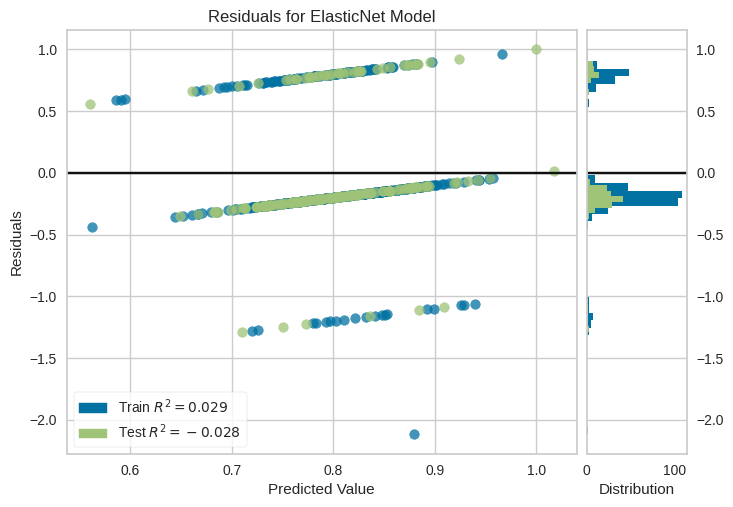

In [82]:
# plot residuals
plot_model(best, plot = 'residuals')

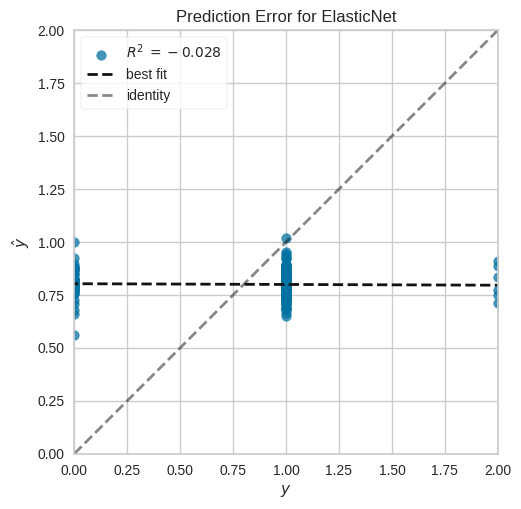

In [83]:
# plot error
plot_model(best, plot = 'error')

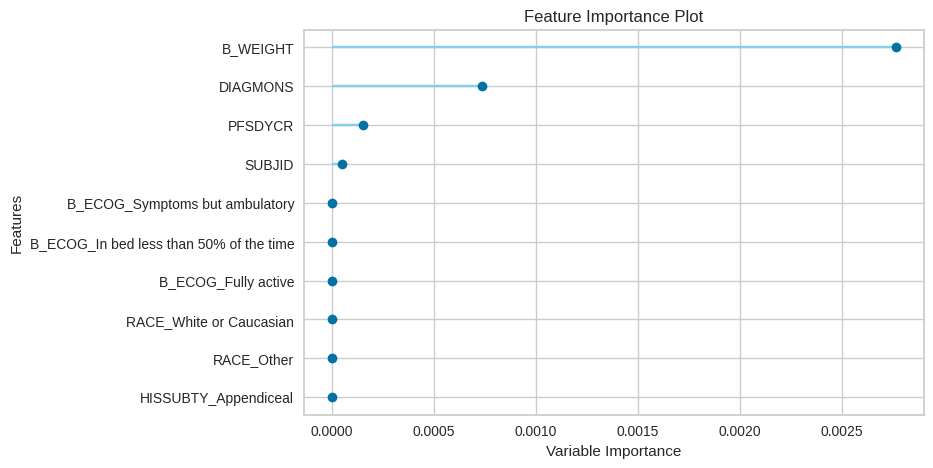

In [84]:
# plot feature importance
plot_model(best, plot = 'feature')

In [85]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [80]:
# predict on test set rf
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3926,0.2565,0.5065,-0.1829,0.3241,0.2559


In [77]:
# predict on test set huber
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.2901,0.2497,0.4997,-0.1514,0.3299,0.0758


In [74]:
# predict on test set br
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.3668,0.2233,0.4726,-0.0300,0.3072,0.2194


In [68]:
# predict on test set en
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.3663,0.2230,0.4722,-0.0282,0.3071,0.2187


In [86]:
# show predictions df
holdout_pred.head()

,SUBJID,DTHDY,DTH,PFSDYCR,PFSCR,DIAGMONS,AGE,B_WEIGHT,B_HEIGHT,B_METANM,...,B_ECOG_Symptoms but ambulatory,HISSUBTY_Appendiceal,HISSUBTY_Mucinous,HISSUBTY_No sub-type,HISSUBTY_Other,HISSUBTY_Unknown,DIAGTYPE_Colon,DIAGTYPE_Rectal,Total_AE,prediction_label
518,1012,489.0,1.0,314.0,1.0,1.901639,77.0,80.800003,153.0,1.0,...,False,False,False,False,True,False,True,False,0.0,0.47
11,31,1311.0,0.0,505.0,1.0,0.655738,63.0,60.000000,154.0,2.0,...,False,False,False,False,False,True,True,False,1.0,0.32
373,719,300.0,1.0,300.0,1.0,2.295082,78.0,66.599998,172.0,3.0,...,True,False,False,True,False,False,True,False,1.0,0.56
107,234,1144.0,0.0,109.0,1.0,1.377049,55.0,64.900002,148.0,1.0,...,False,False,False,False,False,True,True,False,0.0,0.91
203,408,1125.0,0.0,282.0,1.0,0.590164,60.0,76.000000,150.0,4.0,...,False,False,False,True,False,False,True,False,1.0,0.72


In [88]:
new_data = X.copy()
new_data.head()

,SUBJID,DTHDY,DTH,PFSDYCR,PFSCR,DIAGMONS,AGE,B_WEIGHT,B_HEIGHT,B_METANM,...,B_ECOG_Fully active,B_ECOG_In bed less than 50% of the time,B_ECOG_Symptoms but ambulatory,HISSUBTY_Appendiceal,HISSUBTY_Mucinous,HISSUBTY_No sub-type,HISSUBTY_Other,HISSUBTY_Unknown,DIAGTYPE_Colon,DIAGTYPE_Rectal
0,3,301.0,1.0,54.0,1.0,1.868852,65.0,67.0,165.0,5.0,...,False,False,True,False,False,True,False,False,True,False
1,7,339.0,1.0,339.0,1.0,2.786885,52.0,53.0,160.0,3.0,...,False,False,True,False,True,False,False,False,True,False
2,9,696.0,1.0,301.0,1.0,75.704918,42.0,69.0,148.0,4.0,...,True,False,False,False,False,True,False,False,True,False
3,13,197.0,1.0,73.0,1.0,2.032787,54.0,62.0,160.0,6.0,...,True,False,False,False,False,False,True,False,False,True
4,15,414.0,1.0,414.0,1.0,3.803279,67.0,48.8,155.0,2.0,...,False,False,True,False,False,True,False,False,False,True


In [89]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,SUBJID,DTHDY,DTH,PFSDYCR,PFSCR,DIAGMONS,AGE,B_WEIGHT,B_HEIGHT,B_METANM,...,B_ECOG_In bed less than 50% of the time,B_ECOG_Symptoms but ambulatory,HISSUBTY_Appendiceal,HISSUBTY_Mucinous,HISSUBTY_No sub-type,HISSUBTY_Other,HISSUBTY_Unknown,DIAGTYPE_Colon,DIAGTYPE_Rectal,prediction_label
0,3,301.0,1.0,54.0,1.0,1.868852,65.0,67.000000,165.0,5.0,...,False,True,False,False,True,False,False,True,False,0.848881
1,7,339.0,1.0,339.0,1.0,2.786885,52.0,53.000000,160.0,3.0,...,False,True,False,True,False,False,False,True,False,0.767891
2,9,696.0,1.0,301.0,1.0,75.704918,42.0,69.000000,148.0,4.0,...,False,False,False,False,True,False,False,True,False,0.871520
3,13,197.0,1.0,73.0,1.0,2.032787,54.0,62.000000,160.0,6.0,...,False,False,False,False,False,True,False,False,True,0.831836
4,15,414.0,1.0,414.0,1.0,3.803279,67.0,48.799999,155.0,2.0,...,False,True,False,False,True,False,False,False,True,0.745385


In [90]:
# save pipeline
save_model(best, 'm1_total-ae_reg_1183')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SUBJID', 'DTHDY', 'DTH',
                                              'PFSDYCR', 'PFSCR', 'DIAGMONS',
                                              'AGE', 'B_WEIGHT', 'B_HEIGHT',
                                              'B_METANM'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', ElasticNet(random_state=123))]),
 'm1_total-ae_reg_1183.pkl')

In [91]:
# load pipeline
loaded_best_pipeline = load_model('m1_total-ae_reg_1183')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['SUBJID', 'DTHDY', 'DTH',
                                             'PFSDYCR', 'PFSCR', 'DIAGMONS',
                                             'AGE', 'B_WEIGHT', 'B_HEIGHT',
                                             'B_METANM'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', ElasticNet(random_state=123))])

In [92]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [93]:
# lets access X_train_transformed
get_config('X_train_transformed')

,SUBJID,DTHDY,DTH,PFSDYCR,PFSCR,DIAGMONS,AGE,B_WEIGHT,B_HEIGHT,B_METANM,...,B_ECOG_Fully active,B_ECOG_In bed less than 50% of the time,B_ECOG_Symptoms but ambulatory,HISSUBTY_Appendiceal,HISSUBTY_Mucinous,HISSUBTY_No sub-type,HISSUBTY_Other,HISSUBTY_Unknown,DIAGTYPE_Colon,DIAGTYPE_Rectal
114,245.0,330.0,1.0,177.0,1.0,4.688525,35.0,59.700001,154.000000,2.0,...,True,False,False,False,False,True,False,False,True,False
91,207.0,665.0,0.0,729.0,0.0,25.704918,50.0,77.000000,165.800003,3.0,...,True,False,False,False,False,False,False,True,False,True
556,1081.0,1108.0,0.0,156.0,0.0,3.540984,72.0,51.099998,157.000000,3.0,...,False,True,False,False,False,False,False,True,False,True
367,711.0,328.0,1.0,328.0,1.0,0.885246,58.0,82.000000,175.000000,2.0,...,True,False,False,False,True,False,False,False,True,False
511,998.0,725.0,1.0,323.0,1.0,1.573771,73.0,71.000000,168.000000,3.0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,224.0,718.0,1.0,718.0,1.0,0.327869,52.0,84.000000,172.000000,4.0,...,False,False,True,False,False,True,False,False,True,False
322,627.0,1169.0,0.0,440.0,1.0,29.147541,75.0,89.000000,175.000000,2.0,...,True,False,False,False,False,False,False,True,False,True
382,738.0,280.0,0.0,202.0,1.0,2.393443,53.0,65.000000,166.000000,2.0,...,True,False,False,False,False,False,True,False,False,True
365,709.0,1054.0,1.0,58.0,1.0,0.491803,71.0,54.000000,165.000000,2.0,...,True,False,False,False,False,False,False,True,True,False


In [94]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [95]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3990,0.2652,0.5128,-0.0370,0.3240,0.2449,0.3990
gbr,Gradient Boosting Regressor,0.4023,0.2711,0.5171,-0.0552,0.3254,0.2523,0.1780
catboost,CatBoost Regressor,0.4166,0.2853,0.5317,-0.1177,0.3339,0.2656,3.3570
et,Extra Trees Regressor,0.4156,0.2851,0.5318,-0.1231,0.3323,0.2666,0.4770
lightgbm,Light Gradient Boosting Machine,0.4299,0.2999,0.5451,-0.1738,0.3395,0.2910,0.2260
xgboost,Extreme Gradient Boosting,0.4311,0.3074,0.5520,-0.2137,0.3448,0.2904,0.2010
dt,Decision Tree Regressor,0.4682,0.5058,0.7047,-1.0052,0.4484,0.3265,0.6120


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [96]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.3310,0.2958,0.5412,-0.1530,0.3512,0.0858,0.0710
en,Elastic Net,0.3974,0.2649,0.5122,-0.0310,0.3266,0.2246,0.0360
br,Bayesian Ridge,0.3980,0.2660,0.5132,-0.0349,0.3270,0.2248,0.0360
omp,Orthogonal Matching Pursuit,0.3983,0.2677,0.5147,-0.0396,0.3280,0.2241,0.0370
rf,Random Forest Regressor,0.3990,0.2652,0.5128,-0.0370,0.3240,0.2449,0.6020
dummy,Dummy Regressor,0.4000,0.2649,0.5119,-0.0277,0.3266,0.2253,0.0320
lar,Least Angle Regression,0.4000,0.2711,0.5188,-0.0638,0.3288,0.2352,0.0420
lasso,Lasso Regression,0.4011,0.2676,0.5148,-0.0413,0.3280,0.2267,0.0400
llar,Lasso Least Angle Regression,0.4011,0.2676,0.5148,-0.0413,0.3280,0.2267,0.0390
ridge,Ridge Regression,0.4016,0.2744,0.5219,-0.0762,0.3300,0.2361,0.0400


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [97]:
# list of top 3 models by MAE
best_mae_models_top3

[HuberRegressor(), ElasticNet(random_state=123), BayesianRidge()]

In [107]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4419,0.5349,0.7314,-0.7473,0.4383,0.2696
1,0.4884,0.5349,0.7314,-1.8097,0.4903,0.3438
2,0.4651,0.5116,0.7153,-1.4133,0.4551,0.2879
3,0.4419,0.4884,0.6988,-0.3850,0.4170,0.2188
4,0.5116,0.5116,0.7153,-1.1598,0.4730,0.4032
5,0.3571,0.3571,0.5976,-0.2910,0.3860,0.2206
6,0.3333,0.3333,0.5774,-0.3835,0.3809,0.2167
7,0.4762,0.5238,0.7237,-0.9871,0.4439,0.4032
8,0.7857,0.8810,0.9386,-1.7750,0.5993,0.5962


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [108]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3993,0.3106,0.5573,-0.0148,0.3184,0.2340
1,0.3504,0.1942,0.4407,-0.0203,0.3117,0.1937
2,0.3622,0.2121,0.4606,-0.0005,0.3078,0.2111
3,0.4731,0.3571,0.5976,-0.0128,0.3543,0.2688
4,0.3879,0.2407,0.4907,-0.0163,0.3329,0.2067
5,0.4166,0.2902,0.5387,-0.0489,0.3143,0.2579
6,0.3923,0.2456,0.4956,-0.0196,0.3365,0.2067
7,0.4040,0.2639,0.5137,-0.0010,0.3327,0.2243
8,0.4727,0.3394,0.5825,-0.0690,0.3908,0.2167


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [109]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3728,0.2937,0.5419,0.0407,0.3100,0.2094
1,0.3597,0.2250,0.4743,-0.1819,0.3271,0.2007
2,0.3606,0.2272,0.4767,-0.0717,0.3162,0.1997
3,0.4806,0.3783,0.6150,-0.0727,0.3574,0.2871
4,0.3937,0.2461,0.4961,-0.0389,0.3347,0.2136
5,0.4416,0.3176,0.5635,-0.1479,0.3329,0.2886
6,0.4008,0.2567,0.5067,-0.0656,0.3387,0.2248
7,0.4188,0.3039,0.5513,-0.1530,0.3500,0.2289
8,0.5075,0.3794,0.6159,-0.1951,0.4134,0.2608


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [110]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3993,0.3106,0.5573,-0.0148,0.3184,0.2340
1,0.3504,0.1942,0.4407,-0.0203,0.3117,0.1937
2,0.3622,0.2121,0.4606,-0.0005,0.3078,0.2111
3,0.4731,0.3571,0.5976,-0.0128,0.3543,0.2688
4,0.3879,0.2407,0.4907,-0.0163,0.3329,0.2067
5,0.4166,0.2902,0.5387,-0.0489,0.3143,0.2579
6,0.3923,0.2456,0.4956,-0.0196,0.3365,0.2067
7,0.4040,0.2639,0.5137,-0.0010,0.3327,0.2243
8,0.4727,0.3394,0.5825,-0.0690,0.3908,0.2167


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [111]:
# model object
tuned_dt

DecisionTreeRegressor(max_depth=14, max_features='log2',
                      min_impurity_decrease=0.5, min_samples_leaf=2,
                      random_state=123)

In [112]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['SUBJID',
                                                                          'DTHDY',
                                                                          'DTH',
                                                                          'PFSDYCR',
                                                                          'PFSCR',
                                                                          'DIAGMONS',
                                                                          'AGE',
                                                                          'B_WEIGHT',
                                                                          'B_HEIGHT',
                                                                          'B_METANM'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=[...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                               

In [113]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3993,0.3106,0.5573,-0.0148,0.3184,0.2340
1,0.3504,0.1942,0.4407,-0.0203,0.3117,0.1937
2,0.3622,0.2121,0.4606,-0.0005,0.3078,0.2111
3,0.4731,0.3571,0.5976,-0.0128,0.3543,0.2688
4,0.3879,0.2407,0.4907,-0.0163,0.3329,0.2067
5,0.4166,0.2902,0.5387,-0.0489,0.3143,0.2579
6,0.3923,0.2456,0.4956,-0.0196,0.3365,0.2067
7,0.4040,0.2639,0.5137,-0.0010,0.3327,0.2243
8,0.4727,0.3394,0.5825,-0.0690,0.3908,0.2167


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn:Searching the best hyperparameters using 425 samples...
INFO:optuna_integration.sklearn:Finished hyperparameter search!


In [118]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0751a402374c3f3372.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [119]:
# create api
create_api(best, api_name = 'pramod')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python pramod.py


In [120]:
!python pramod.py

Transformation Pipeline and Model Successfully Loaded
Traceback (most recent call last):
  File "/content/pramod.py", line 16, in <module>
    input_model = create_model("pramod_input", **{'SUBJID': 245, 'DTHDY': 330.0, 'DTH': 1.0, 'PFSDYCR': 177.0, 'PFSCR': 1.0, 'DIAGMONS': 4.6885247230529785, 'AGE': 35.0, 'B_WEIGHT': 59.70000076293945, 'B_HEIGHT': 154.0, 'B_METANM': 2.0, 'PRSURG_N': False, 'PRSURG_Y': True, 'LIVERMET_N': False, 'LIVERMET_Y': True, 'SEX_Female': True, 'SEX_Male': False, 'RACE_Asian': False, 'RACE_Black or African American': True, 'RACE_Hispanic or Latino': False, 'RACE_Other': False, 'RACE_White or Caucasian': False, 'B_ECOG_Fully active': True, 'B_ECOG_In bed less than 50% of the time': False, 'B_ECOG_Symptoms but ambulatory': False, 'HISSUBTY_Appendiceal': False, 'HISSUBTY_Mucinous': False, 'HISSUBTY_No sub-type': True, 'HISSUBTY_Other': False, 'HISSUBTY_Unknown': False, 'DIAGTYPE_Colon': True, 'DIAGTYPE_Rectal': False})
  File "/usr/local/lib/python3.10/dist-packag

In [122]:
%load pramod.py

In [123]:
create_docker('pramod')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [125]:
%load Dockerfile

In [127]:
%load requirements.txt

In [131]:
final_best = finalize_model(best)

In [132]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['SUBJID', 'DTHDY', 'DTH',
                                             'PFSDYCR', 'PFSCR', 'DIAGMONS',
                                             'AGE', 'B_WEIGHT', 'B_HEIGHT',
                                             'B_METANM'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', ElasticNet(random_state=123))])

In [134]:
# save experiment
save_experiment('my_experiment')

In [135]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,Total_AE_y
2,Target type,Regression
3,Original data shape,"(608, 36)"
4,Transformed data shape,"(608, 40)"
5,Transformed train set shape,"(425, 40)"
6,Transformed test set shape,"(183, 40)"
7,Numeric features,11
8,Categorical features,3
9,Rows with missing values,24.0%
